# Customer Segmentation Project (K-Means Clustering)

## Table of Contents
### [Import and Load the Data](#import)
### [Exploratory Data Analysis](#eda)
### [Explore Clustering Solutions and Select the Number of Clusters](#explore_clustering)
#### [First K-Means Clustering Attempt](#first_attempt)
#### [Standardize 'Satisfaction' Variable](#standardize)
#### [Elbow Method to Determine Number of Clusters](#elbow_method)
#### [2 Cluster Solution](#2_clusters)
#### [3 Cluster Solution](#3_clusters)
#### [4 Cluster Solution](#4_clusters)
#### [5 Cluster Solution](#5_clusters)
#### [Clustering Conclusion](#cluster_conclusion)
### [Business Insight](#business)
### [Project Summary](#project_summary)

## Import Libraries <a class="anchor" id="import"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set the styles to seaborn
sns.set()
from sklearn.cluster import KMeans
from sklearn import preprocessing

## Load the Data

In [2]:
data = pd.read_csv ('customer information.csv')

In [3]:
# Check the data
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


## Exploratory Data Analysis <a class="anchor" id="eda"></a>
### Understanding the Business Meaning of the Data

The data was provided with the following information:

**Satisfaction** 
* Customers rated their own experience/satisfaction on a sale of 1-10, with 10 being the most satisfied. 
* Satisfaction is thus a discrete variable and takes integer values.

**Brand loyalty** 
* There is no widely accepted technique to measure loyalty but there are proxies like churn rate, retention rate, or customer lifetime value (CLV). 
* Upon being provided with the dataset I was told loyalty was measured through the number of purchases made from that shop in a year and "a number of other factors that were found to be significant". 
* The values range from -2.5 to 2.5 as the variable is already standardised.

### Plot the Data
I first created a preliminary scatter plot to see if any trends, patterns or clusters stood out.

Text(0, 0.5, 'Loyalty')

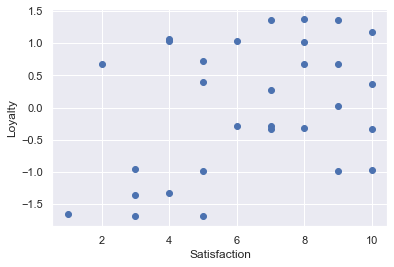

In [4]:
# Create a scatter plot of the two variables: staisfaction and loyalty
plt.scatter(data['Satisfaction'],data['Loyalty']) 
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

### Interpretation
* There appear to be two clusters (one small and one quite large) that could logically be categorised as:
    1. Low loyalty and low satisfaction
    2. Higher loyalty with varying levels of satisfaction.
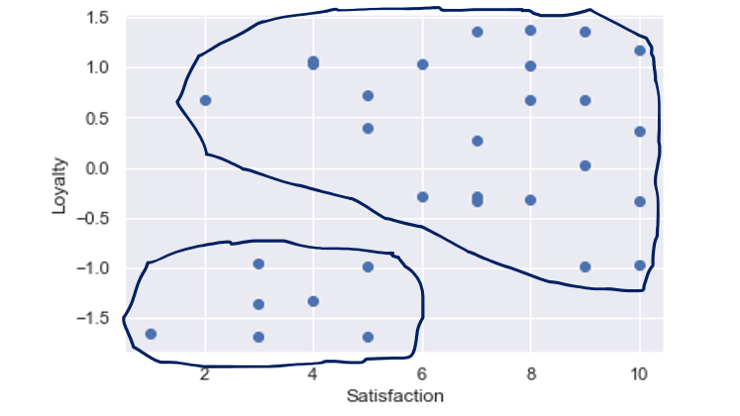

### Splitting the Graph
* I decided to split the graph into four even squares; each square would effectively represent a different type of customer:
 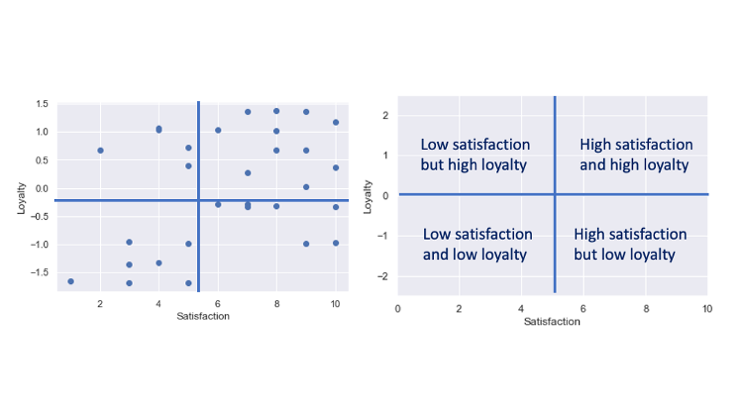
* Splitting the graph into four squares shows that the large cluster — from the earlier manually made clusters — has observations in 3 of the 4 squares.
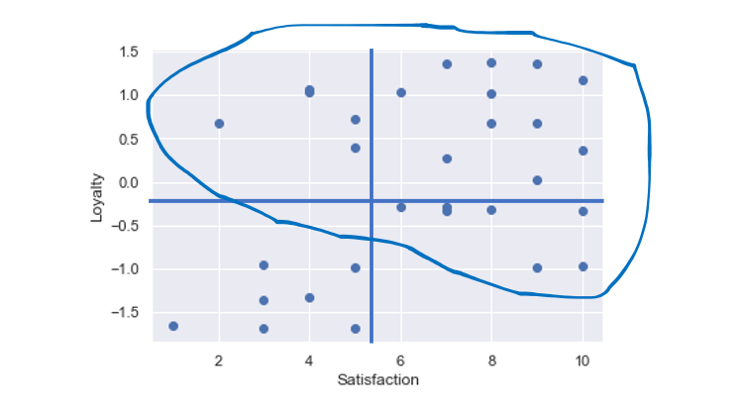

### Next Steps
* Further cluster analysis is required to determine the optimal number of clusters. 

## Explore Clustering Solutions and Select the Number of Clusters <a class="anchor" id="explore_clustering"></a>
### First K-Means Clustering Attempt <a class="anchor" id="first_attempt"></a>
* I decided to use K-Means clustering. 
* The first K-Means clustering attempt (with 2 clusters) drew my attention to the fact that the 'satisfaction' data had not been standardized. 
* As such, the algorithm placed greater emphasis on the satisfaction values (because they were higher (ranging from 1-10)) than the 'loyalty' values (which had been standardized prior to receiving the data set, and which ranged in value from -2.5 to 2.5). 
* The algorithm thus split the data into two clusters with a cut off point of 6 (explained and illustrated below). 
* This initial, and flawed, K-Means clustering process is detailed  below:

In [5]:
# Select both features by creating a copy of the data variable
x = data.copy()

In [6]:
# Create an object called kmeans
kmeans = KMeans(2)
# Fit the data
kmeans.fit(x)

KMeans(n_clusters=2)

In [7]:
# Create a copy of the input data.
# Clusters is a duplicate of x, and the column 'cluster_pred' will contain the cluster where the particular 
# observation was predicted to be placed by the algorithm.
clusters = x.copy()
clusters['cluster_pred']=kmeans.fit_predict(x)

Text(0, 0.5, 'Loyalty')

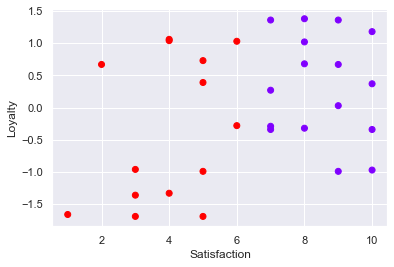

In [8]:
# Plot the data
plt.scatter(clusters['Satisfaction'],clusters['Loyalty'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

In the above output there are two clusters but not they are not the same as the clusters we speculated earlier: 

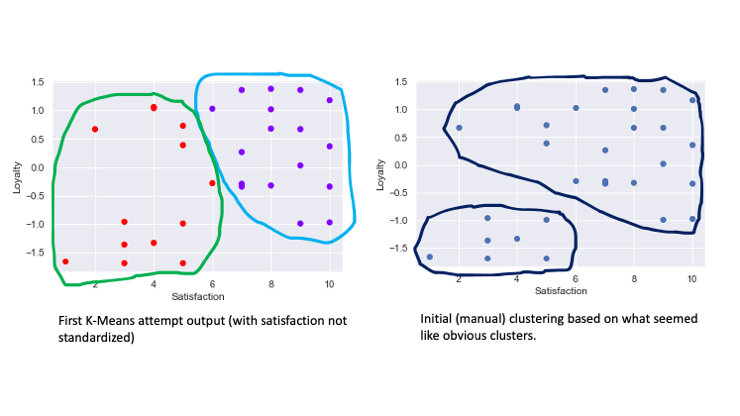

Analysing the scatter plot reveals that there is a cut off point at satisfaction value 6; everything to the left is one cluster and everything to the right is another cluster:
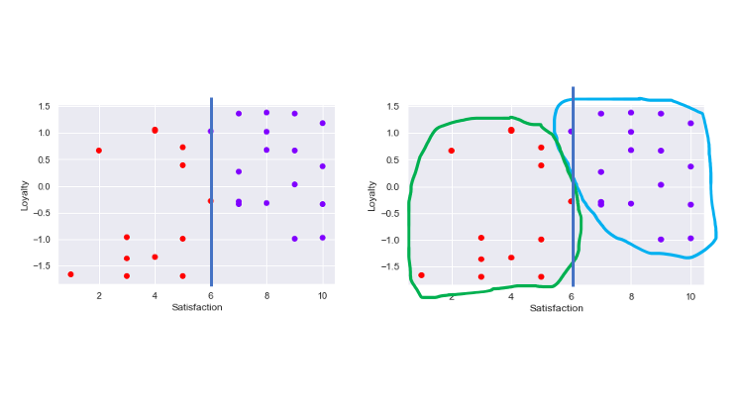

* It would appear that satisfaction has been much more heavily weighted than loyalty and, as a result, the algorithm has almost disregarded loyalty due to the lower values. 
* Satisfaction and loyalty are equally important variables for customer segmentation; thus, the satisfaction variable needs to be standardized...

## Standardize the Satisfaction Variable <a class="anchor" id="standardize"></a>

In [24]:
# Scale each variable separately and produce the result in an array (standardized with mean 0 and standard deviation of 1)
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

* As we can see from the output array, x_scaled is an array that contains the standardised Satisfaction values and the same (original) values for  Loyalty. 
* This is because Loyalty was already standardised, it had a mean of 0 and a standard deviation of 1.

## Use 'The Elbow method' to determine how many clusters best suit the data <a class="anchor" id="elbow_method"></a>

In [10]:
# Create an empty list called wccs, which stands for within cluster sum of squares
wcss =[]

# Create all possible cluster solutions with a loop (8 cluster solutions should be enough to find the best number to use)
for i in range(1,9):
    # Cluster solution with i clusters
    kmeans = KMeans(i)
    # Fit the standardized data
    kmeans.fit(x_scaled)
    # Append the WCSS for the iteration
    wcss.append(kmeans.inertia_)
    
# Check the result
wcss

[59.999999999999986,
 29.818973034723143,
 17.913349527387968,
 10.247181805928422,
 7.792695153937187,
 6.569489487091783,
 5.464232350204886,
 4.337110750237059]

Text(0, 0.5, 'WCSS')

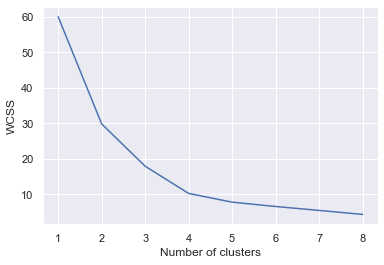

In [11]:
# Plot the number of clusters vs WCSS so the elbow can be visualised and (hopefully!) reveal the best number of clusters to use
plt.plot(range(1,9),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

### How many Clusters?
* The graph above shows that the optimal number of clusters is likely 2, 3, 4 or 5. 
* I'll now try each of these to see what the outputs and graphs look like...

### 2 Cluster Solution <a class="anchor" id="2_clusters"></a>

In [12]:
kmeans_new = KMeans(2)
# Fit the data
kmeans_new.fit(x_scaled)
# Create a new data frame with the predicted clusters
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)

In [13]:
# Check if everything seems right
clusters_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,0
1,6,-0.28,1
2,5,-0.99,0
3,7,-0.29,1
4,4,1.06,1
5,1,-1.66,0
6,10,-0.97,1
7,8,-0.32,1
8,8,1.02,1
9,8,0.68,1


### Important Note on Standardizing and Graph Interpretation
* It's very important to note that the dataframe above contains the original satisfaction values but the clusters are based on the solution using the standardised data (the model was fitted with x_scaled to ensure the clusters were predicted based on the standardized data).
* I'll plot the data without standardising it to allow for clearer interpretability. Keeping the original x axis provides  a clearer view of how satisifed the customers were; if a plot was created with a standardized x axis it would be less intuitive, and potentially even confusing, due to the mid-point of each graph being different. The mid-point of the scaled x axis would be 0, and this would correspond to the mean of the variable, which in this case is 6.4. Contrarily, the mid-point of the x axis when the x axis isn't scaled is 5, which makes interpreting the level of satisfaction, which are values of 1-10, easier to interpret... but it is **very important to note that the solution itself comes from the standardised data**. 

Text(0, 0.5, 'Loyalty')

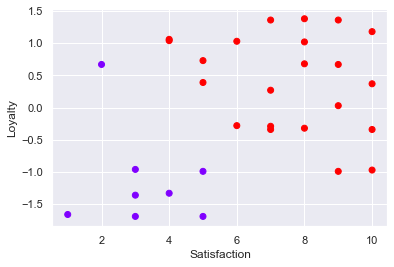

In [14]:
# Plot the output
plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'],c=clusters_new['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

### 2 Cluster Solution Analysis
* The clusters are different than the first attempt (when the stisfaction variable wasn't standardised); by comparing this solution with the first attempt it's clear to see that both features — satisfaction and loyalty — have been taken into account:
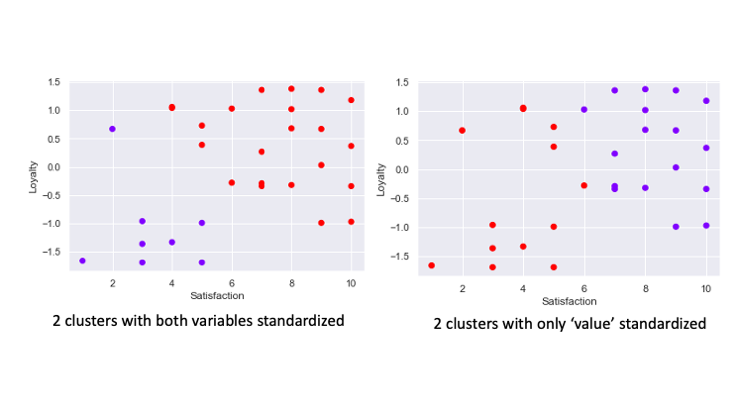

* The result of this 2 cluster solution is similar to the initial (manual) 2 cluster speculation. This provides confidence that the standardization of the 'satisfaction' variable has had a positive effect.
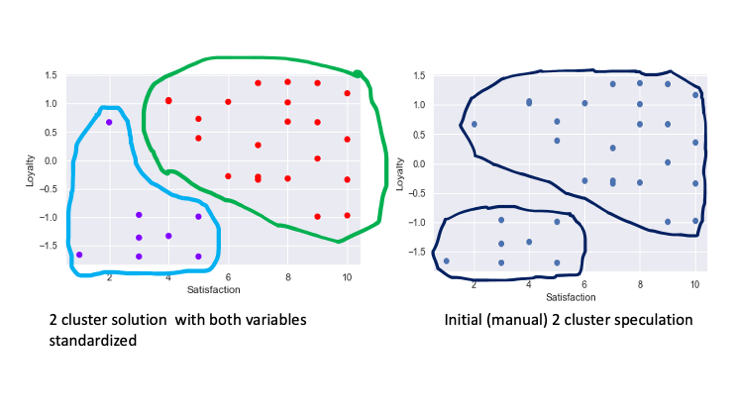

### Naming the Clusters (Interpreting the Business Meaning)
* I'll call the low satisfaction-low loyalty cluster 'Disengaged' and the other cluster, because the observations within it are quite diverse, 'Everyone else'.
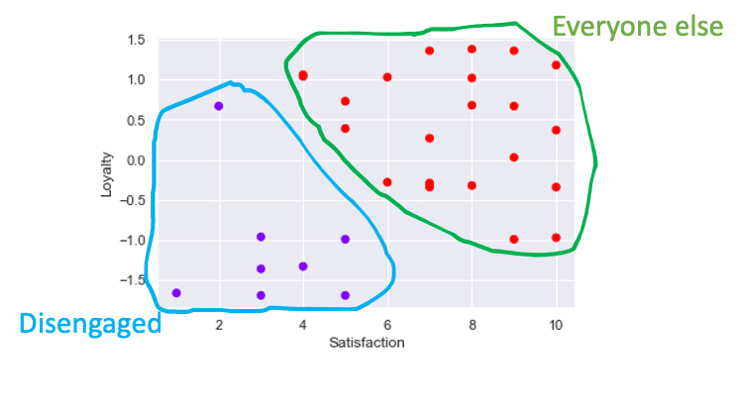

Now it's time to repeat the process for 3, 4 and 5 cluster solutions...

## 3 Cluster Solution <a class="anchor" id="3_clusters"></a>

In [15]:
# Change the number of clusters to 3
kmeans_new = KMeans(3)
# Fit the data
kmeans_new.fit(x_scaled)
# Create a new data frame with the predicted clusters
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)

In [16]:
# Check the result
clusters_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,2
1,6,-0.28,0
2,5,-0.99,2
3,7,-0.29,0
4,4,1.06,1
5,1,-1.66,2
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,0
9,8,0.68,0


Text(0, 0.5, 'Loyalty')

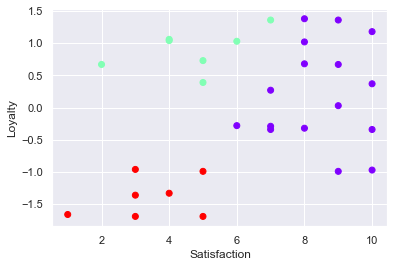

In [17]:
# Plot the output
plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'],c=clusters_new['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

### 3 Cluster Solution Analysis
* The 'Disengaged' cluster remains.
* The 'everyone else' cluster has split into two clusters, one fairly small and one much larger.
* I'll call the smaller of the two clusters 'Supporters' as these observations don't appear to be particularly satisified, but they are loyal to the brand.
* The larger of the two clusters will remain as the 'Everyone else' cluster as it is still quite diverse, ranging from people who are very satisifed but not loyal, to people who are very satisifed and very loyal.

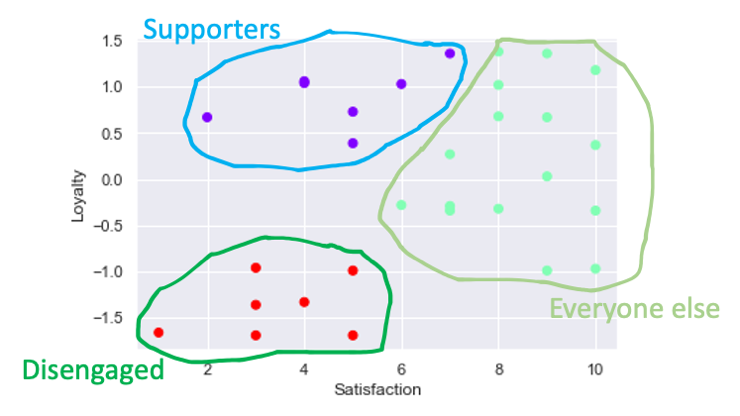

## 4 Cluster Solution <a class="anchor" id="4_clusters"></a>

In [18]:
# Change the number of clusters to 4
kmeans_new = KMeans(4)
# Fit the data
kmeans_new.fit(x_scaled)
# Create a new data frame with the predicted clusters
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)

In [19]:
# Check the output
clusters_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,1
1,6,-0.28,3
2,5,-0.99,1
3,7,-0.29,3
4,4,1.06,2
5,1,-1.66,1
6,10,-0.97,3
7,8,-0.32,3
8,8,1.02,0
9,8,0.68,0


Text(0, 0.5, 'Loyalty')

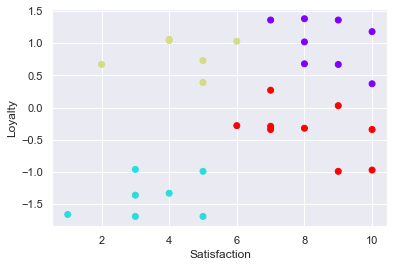

In [20]:
# Plot the output
plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'],c=clusters_new['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

### 4 Cluster Solution Analysis
Now there are 4 distinct groups:

1. **Fans:** Highly satisfied and highly loyal.
2. **Supporters:** Loyal to the brand but not particularly satisifed.
3. **Floaters:** This group is harder to define — they are satisfied but not particularly loyal to the brand, and in some cases disloyal.
4. **Disengaged:** Not satisfied and not loyal.

So far this has been the best cluster solution as it appears to split the customers logically into groups with clear differentiating qualities.

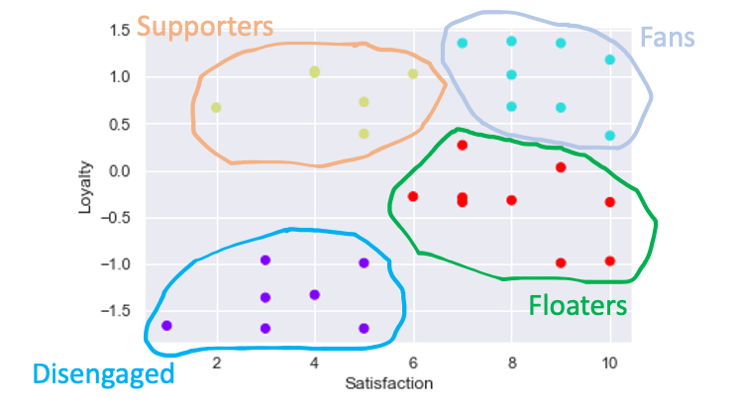

## 5 Cluster Solution <a class="anchor" id="5_clusters"></a>

In [21]:
# Change the number of clusters
kmeans_new = KMeans(5)
# Fit the data
kmeans_new.fit(x_scaled)
# Create a new data frame with the predicted clusters
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)

In [22]:
# Check the output
clusters_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,1
1,6,-0.28,2
2,5,-0.99,1
3,7,-0.29,2
4,4,1.06,4
5,1,-1.66,1
6,10,-0.97,3
7,8,-0.32,2
8,8,1.02,0
9,8,0.68,0


Text(0, 0.5, 'Loyalty')

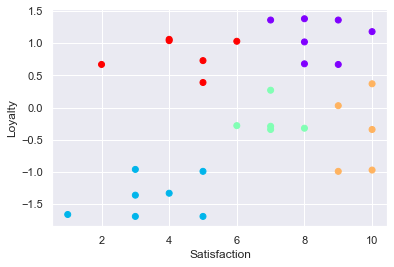

In [23]:
# Plot the output
plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'],c=clusters_new['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

### 5 Cluster Solution Analysis
* The disengaged, supporters and fans clusters remain essentially unchanged. 
* The floaters cluster has been split into two clusters:
    1. **Floaters 1:** Highly satisfied with both neutral levels of loyalty and some disloyalty.
    2. **Floaters 2:** Moderate to high satisfaction and neutral loyalty. 
* Splitting the Floaters cluster into 2 doesn't appear to add much value to the segmentation.

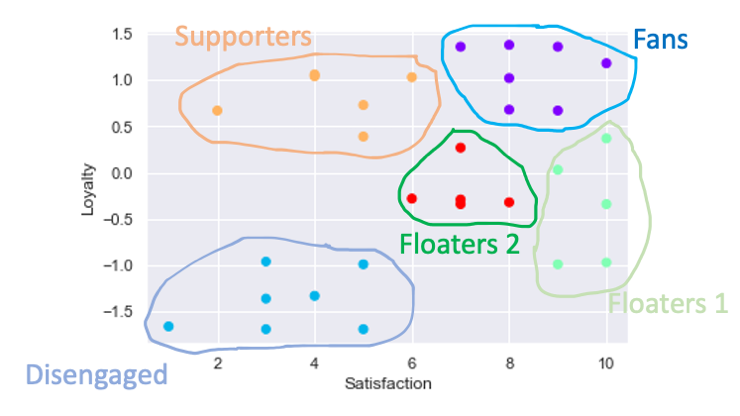

## Cluster Solution Conclusion <a class="anchor" id="cluster_conclusion"></a>
* The 4 cluster solution appears to be the best cluster solution. It splits the customers into enough groups where meaningful differences in their loyalty and satisfaction can be detected but not so many that the differentiating qualities become minute.

## Business Insight <a class="anchor" id="business"></a>
* The business could use the customer segmentation information as a starting point for further market research; segmenting the customers facilitates further analysis that could help to inform marketing and promotional strategy. 
* For example, the business now knows that there are two distinct groups: supporters and fans, and may want to run a marketing campaign that attempts to turn supporters into fans. The business now knows which customer is in each group and could use purchase history to investigate questions that will provide further insight such as: 
    1. Are there any differentiating factors between supporters and fans with regard to frequency and type of purchase? 
    2. What type of products do they buy? 
    3. How much do they spend? 
    4. Do they shop at particular times of the year? 
    5. Does one group use promotional offers more than the other?
* The answers to this type of question can provide a marketing team with powerful information for a marketing campaign.
    
## Project Summary <a class="anchor" id="project_summary"></a>
* 4 groups of customers were identified: fans, supporters, floaters and disengaged, through the use of K-Means clustering.
* The goal of the task was achieved; business insight was provided into the different types of customers the business has based on a customer satisfaction and brand loyalty survey.
* The task was successfully completed through a combination of data analysis, statisitcal manipulation, data visualisation and business intuition. 